In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 18.1 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')

In [31]:
langsmith=userdata.get('langsmith_api_key')

In [62]:
import os
os.environ["LANGSMITH_API_KEY"] = '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'
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]='Courselanggraph'

In [63]:
from langchain_groq import ChatGroq

In [64]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name='Gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d65bf1a9750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d65c6347510>, model_name='Gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [65]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [66]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [67]:
graph_builder=StateGraph(State)

In [68]:
graph_builder

In [69]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [70]:
graph_builder.add_node('chatbot',chatbot)

In [71]:
graph_builder.add_edge(START,'chatbot')

In [72]:
graph_builder.add_edge('chatbot',END)

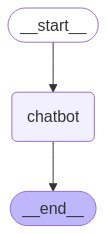

In [73]:
graph_builder.compile()

In [74]:
graph=graph_builder.compile()

In [ ]:
while True:
  user_input=input('User: ')
  if user_input.lower() in ["quit",'q']:
    print('Thank you for using our chatbot. Goodbye!')
    break
  for event in graph.stream({'messages':('user',user_input)}):
    print(event.values)
    for value in event.values():
      print(value['messages'])
      print('bot :',value['messages'].content)

<built-in method values of AddableUpdatesDict object at 0x7d65bf19d7f0>
content='Hoi! 👋 \n\nWhat can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001906656, 'queue_time': 0.019973954000000002, 'total_time': 0.030997565}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-fdb14967-d2a8-45c8-8c95-2258afeeccce-0' usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27}
bot : Hoi! 👋 

What can I do for you today?



<built-in method values of AddableUpdatesDict object at 0x7d65bf012db0>
content="That's a funny question!  \n\nHere are some key differences between a can and a dog:\n\n* **Can:**\n\n    * **Object:** A can is an inanimate object, usually made of metal, used to hold food or other items.\n    * **Purpose:** Cans are designed to store and preserve things.\n    * **Characteristics:** Cans are cylindrical, have a lid, and can be opened.\n\n* **Dog:**\n\n    * **Living creature:** A dog is a living animal, a domesticated mammal.\n    * **Purpose:** Dogs are kept as companions, working animals, or for other purposes.\n    * **Characteristics:** Dogs have fur, four legs, a tail, bark, and are known for their loyalty and intelligence.\n\n\nLet me know if you have any other silly comparisons you'd like to make! 🐶🥫  \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 181, 'prompt_tokens': 21, 'total_tokens': 202, 'completion_time': 0.329090909, 'prompt_time': 0.00212

<built-in method values of AddableUpdatesDict object at 0x7d65bf19da30>
content="You're talking about the classic pairing: **a cat and a dog!**  \n\nWhat about them? \n\nAre you wondering:\n\n* **If they can be friends?**  (They often can!)\n* **How to introduce them safely?** (That's important!)\n* **What makes them different?** (Cats are independent, dogs are pack animals, for starters!)\n* **Funny stories about cats and dogs?** (I've got plenty!)\n\n\nTell me more about what you'd like to know! 🐶🐱 \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 16, 'total_tokens': 137, 'completion_time': 0.22, 'prompt_time': 0.001925485, 'queue_time': 0.029448344999999997, 'total_time': 0.221925485}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-e9967ea9-58c0-4492-b2eb-f823214cbca7-0' usage_metadata={'input_tokens': 16, 'output_tokens': 121, 'total_tokens': 137}
bot : You'

<built-in method values of AddableUpdatesDict object at 0x7d65bf012ed0>
content="As a large language model, I have no memory of past conversations. Every interaction we have is a fresh start. If you'd like to discuss something, please ask away! 😊\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 16, 'total_tokens': 56, 'completion_time': 0.072727273, 'prompt_time': 0.001915015, 'queue_time': 0.020768935000000002, 'total_time': 0.074642288}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-e4664468-bfc6-440f-90b4-295db411cf99-0' usage_metadata={'input_tokens': 16, 'output_tokens': 40, 'total_tokens': 56}
bot : As a large language model, I have no memory of past conversations. Every interaction we have is a fresh start. If you'd like to discuss something, please ask away! 😊

